In [ ]:
# Assignment: Python Data Analysis
# The purpose of this notebook is to analyze data for a class assignment and create four plots:
## 1. A plot of the area covered by each species over all quadrats (y) for each year (x).
## 2. A plot of the area covered by each growth-form over all quadrats (y) for each year (x).
## 3. A plot of the area covered by each growth-form over all quadrats (y) as a function of the mean precipitation for the year (x).
## 4. At least one additional plot investigating the relationship between plant composition (e.g. species or growth form) and another variable.

In [1]:
# The data should be downloaded using DataRetriever, using the following code in the command line/terminal. Do not run this in python
# explantory comments in parentheses after code
# pip install git+https://git@github.com/weecology/retriever.git (this install retriever if it is not already installed)
# retriever install csv mapped-plant-quads-co (this retrieves the specific data as a csv file)

In [56]:
#Installs necessary libraries and settings
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
fig_size=[10,8] #these two lines set the standard size of the plots
plt.rcParams["figure.figsize"] = fig_size

In [61]:
#reads records data into a pandas data frame
survey_data = pd.read_csv('mapped_plant_quads_co_allrecords_cover.csv')
specieslist=pd.read_csv('mapped_plant_quads_co_species_list.csv')
pcpdata=pd.read_csv('mapped_plant_quads_co_daily_climate.csv')
pcpdata.head()

,year,month,day,meant,flag_meant,maxt,flag_maxt,mint,flag_mint,precip,flag_precip
0,1997,1,1,8.33,g,16.11,g,0.56,g,0.000,g
1,1997,1,2,8.89,g,14.44,g,3.33,g,0.000,g
2,1997,1,3,10.56,g,21.67,g,-0.56,g,0.254,g
3,1997,1,4,3.61,g,8.89,g,-1.67,g,0.000,g
4,1997,1,5,-4.44,g,3.89,g,-12.78,g,0.000,g


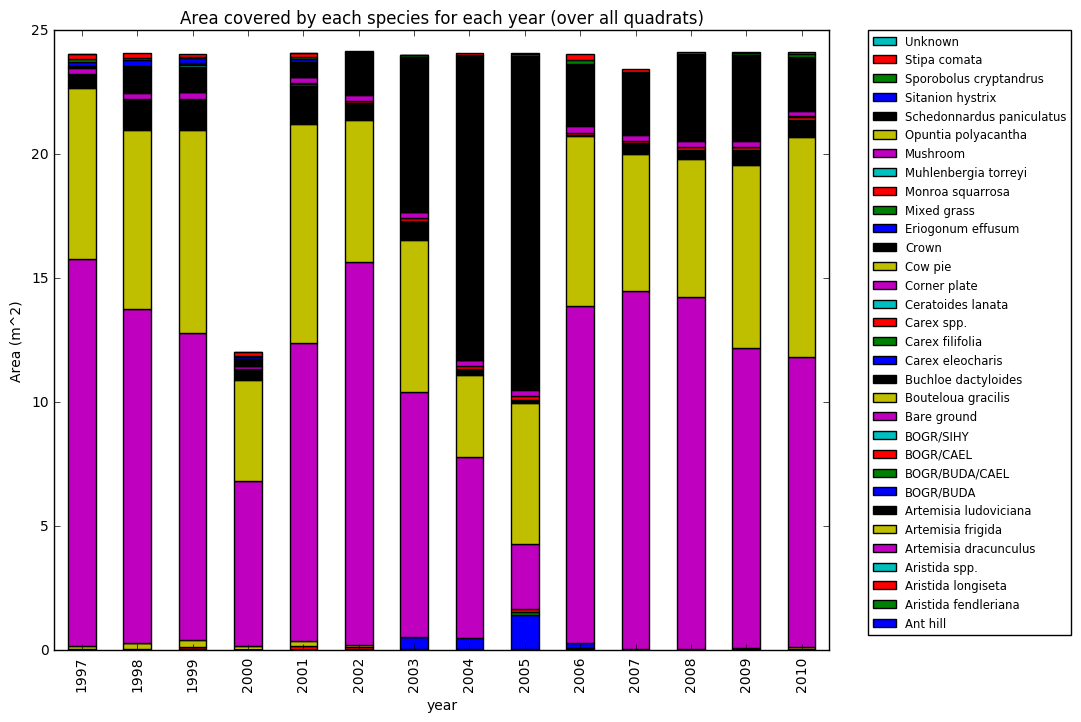

In [59]:
# Creating a plot of the area covered by each species over all quadrats (y) for each year (x).
plot_1_data=survey_data.groupby(['species', 'year'], as_index=False).area.sum() #groups data by species and year and sums
plot_1_datapiv=plot_1_data.pivot(index='year', columns='species', values='area') #pivots for use for plotting
plot1=plot_1_datapiv.plot(kind='bar',stacked=True,title="Area covered by each species for each year (over all quadrats)") #makes a bar chart
plot1.set_ylabel("Area (m^2)")
handles, labels = plot1.get_legend_handles_labels() #this will help make the stacked bars and legend to vis. correspond
plot1.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='small') #changes legend location, text size

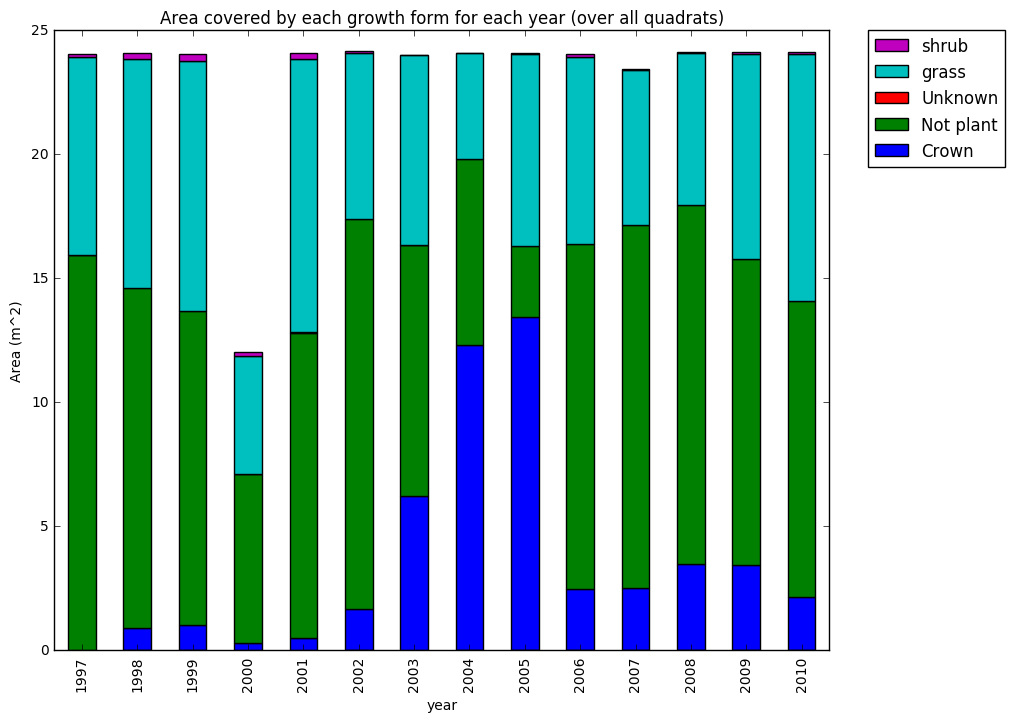

In [60]:
# Creating a plot of the area covered by each growth-form over all quadrats (y) for each year (x).
datawithgf=pd.merge(left=survey_data,right=specieslist, left_on='species', right_on='species') #merges data so coverage data has growthform details
plot_2_data=datawithgf.groupby(['growthform', 'year'], as_index=False).area.sum() #groups data by growthform and year and sums
plot_2_datapiv=plot_2_data.pivot(index='year', columns='growthform', values='area') #pivots for use for plotting
plot2=plot_2_datapiv.plot(kind='bar',stacked=True,title="Area covered by each growth form for each year (over all quadrats)") #makes a bar chart
plot2.set_ylabel("Area (m^2)")
handles, labels = plot2.get_legend_handles_labels() #this will help make the stacked bars and legend to vis. correspond
plot2.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large') #changes legend location, text size